In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import pandas as pd
import numpy as np

from preprocessing import preprocess
from walkforward import WFCVGenerator
from config.config_types import AppConfig

from utils.paths import CONFIG_DIR, SP500COPY_PATH, SP500_PATH, DATA_DIR

<Axes: xlabel='date'>

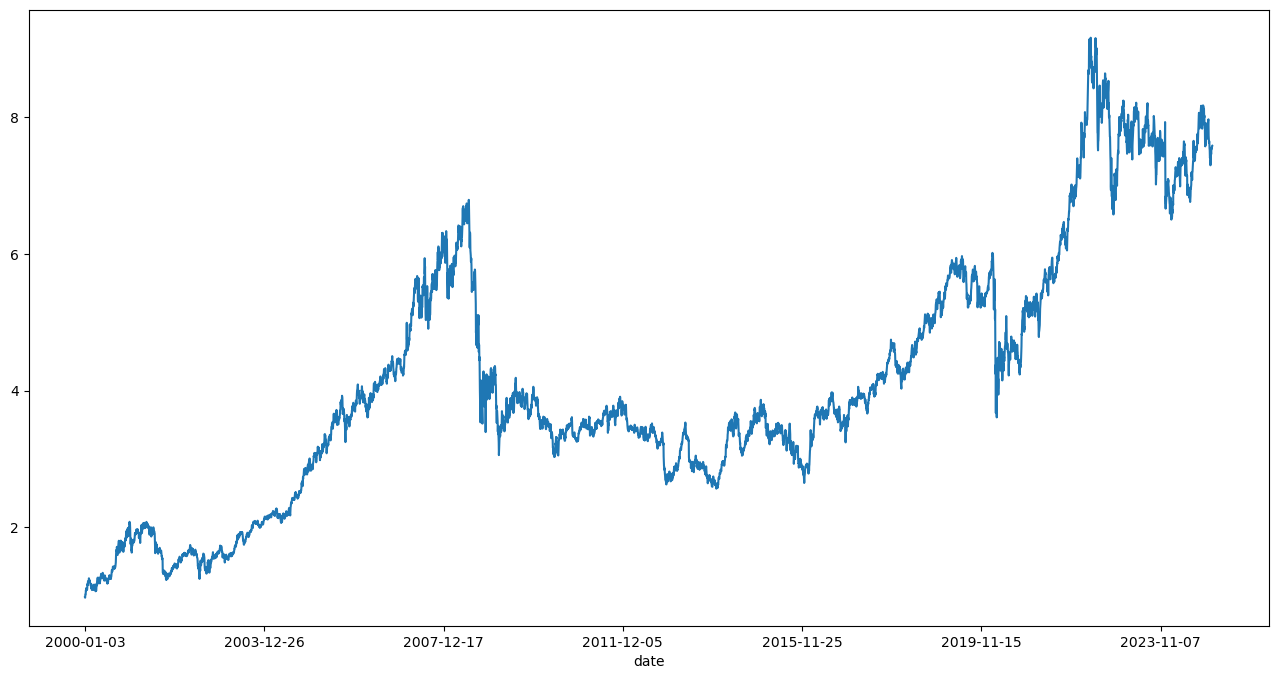

In [16]:
df_sp = pd.read_parquet(SP500_PATH)
df_sp[df_sp["permno"]==21776].set_index("date")["ret"].apply(lambda x: 1+x).cumprod().plot(kind="line", figsize=(16,8))

In [ ]:
cfg = AppConfig.from_dict(f"{CONFIG_DIR}/vol_lstm.yaml")

df = preprocess()

df = df.sort_values(by="var", ascending=False)
df

18:56:26 - Preprocessing - DEBUG - percentage of nan returns 0.0034% (preprocessing.py:97)
18:56:26 - Preprocessing - DEBUG - number of nans in var: 6 (preprocessing.py:179)


,permno,date,ret,close,vol,open,high,low,cfacpr,var,t
124726,21776,2010-05-06,-0.041886,29.640183,12427000.0,30.69522,30.69522,0.000071,1.412272,84.235147,2600
131015,21792,2010-05-06,-0.034771,13.88,9331100.0,14.39,14.39,0.0135,1.0,24.301094,2600
80684,58640,2002-07-16,0.043166,14.5,41692400.0,14.0,15.4,0.1,0.1,12.684970,634
113499,92602,2010-05-06,-0.035106,47.0,16460800.0,48.58,48.92,2.0,1.0,5.110107,2600
204517,86314,2015-08-24,-0.035901,36.79,4215298.0,35.24,37.62,5.4,1.0,1.883290,3934
...,...,...,...,...,...,...,...,...,...,...,...
217028,43123,2003-12-11,0.19,10.71,1534600.0,9.0,10.73,9.41,1.0,-0.003073,990
384104,69032,2001-04-05,0.157755,43.9315,9929200.0,37.945414,44.434533,40.577951,1.192766,-0.004167,317
384213,69032,2001-09-17,-0.130879,35.631465,11448900.0,40.997144,37.869959,35.363181,1.192766,-0.005256,426
288741,24046,2000-03-07,-0.117647,57.594176,9530199.0,65.2734,57.594176,55.554382,1.041772,-0.005401,44


In [18]:
from sklearn.preprocessing import StandardScaler


x_scaler = StandardScaler()
var_tr = x_scaler.fit_transform(df["var"].values.reshape(-1,1))
var_tr

df["var_norm"] = var_tr
df.sort_values(by="var_norm", ascending=False)


,permno,date,ret,close,vol,open,high,low,cfacpr,var,t,var_norm
124726,21776,2010-05-06,-0.041886,29.640183,12427000.0,30.69522,30.69522,0.000071,1.412272,84.235147,2600,1684.058441
131015,21792,2010-05-06,-0.034771,13.88,9331100.0,14.39,14.39,0.0135,1.0,24.301094,2600,485.829260
80684,58640,2002-07-16,0.043166,14.5,41692400.0,14.0,15.4,0.1,0.1,12.684970,634,253.594358
113499,92602,2010-05-06,-0.035106,47.0,16460800.0,48.58,48.92,2.0,1.0,5.110107,2600,102.154212
204517,86314,2015-08-24,-0.035901,36.79,4215298.0,35.24,37.62,5.4,1.0,1.883290,3934,37.642204
...,...,...,...,...,...,...,...,...,...,...,...,...
217028,43123,2003-12-11,0.19,10.71,1534600.0,9.0,10.73,9.41,1.0,-0.003073,990,-0.070847
384104,69032,2001-04-05,0.157755,43.9315,9929200.0,37.945414,44.434533,40.577951,1.192766,-0.004167,317,-0.092719
384213,69032,2001-09-17,-0.130879,35.631465,11448900.0,40.997144,37.869959,35.363181,1.192766,-0.005256,426,-0.114481
288741,24046,2000-03-07,-0.117647,57.594176,9530199.0,65.2734,57.594176,55.554382,1.041772,-0.005401,44,-0.117395


In [19]:
df = df[df["var_norm"].abs()<=4]
df = df.drop(columns="var_norm")

In [20]:
wf = WFCVGenerator(cfg.walkforward)



18:56:27 - WFCVGenerator - DEBUG - WFConfig(train=1200d, val=400d, test=400d, lags=100, step=400, max_folds=None) (walkforward.py:28)
18:56:27 - WFCVGenerator - DEBUG - self.scale_type: asinhstandard (walkforward.py:41)
18:56:27 - WFCVGenerator - DEBUG - self.scale: True (walkforward.py:42)


18:56:29 - Preprocessing - DEBUG - percentage of nan returns 0.0034% (preprocessing.py:97)
18:56:29 - Preprocessing - DEBUG - number of nans in var: 6 (preprocessing.py:179)
18:56:29 - WFCVGenerator - DEBUG - Preprocessed df:            t       var  permno
0          0  0.001527   10078
1          1  0.001098   10078
2          2  0.004587   10078
3          3  0.001987   10078
4          4  0.001109   10078
...      ...       ...     ...
155298  6284  0.000563   93436
155299  6285  0.000265   93436
155300  6286  0.000803   93436
155301  6287  0.000348   93436
155302  6288  0.000972   93436

[3155297 rows x 3 columns] (walkforward.py:75)


In [21]:
wf.df

,t,var,permno
0,0,0.001527,10078
1,1,0.001098,10078
2,2,0.004587,10078
3,3,0.001987,10078
4,4,0.001109,10078
...,...,...,...
155298,6284,0.000563,93436
155299,6285,0.000265,93436
155300,6286,0.000803,93436
155301,6287,0.000348,93436


In [22]:
df_master = wf.df_master

df_master

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,y,window
0,0.001527,0.001098,0.004587,0.001987,0.001109,0.001777,0.002703,0.000863,0.000652,0.000613,...,0.002599,0.000881,0.000992,0.001974,0.001652,0.008360,0.002475,0.008271,0.005492,"(0, 100)"
1,0.005466,0.005548,0.005260,0.004650,0.002337,0.002646,0.001095,0.001718,0.001386,0.001722,...,0.003292,0.000434,0.001066,0.001631,0.001681,0.005962,0.002625,0.004814,0.003590,"(0, 100)"
2,0.001633,0.000877,0.001704,0.001076,0.000759,0.000168,0.001103,0.000623,0.001896,0.001958,...,0.000207,0.000250,0.000261,0.000232,0.000234,0.000889,0.000710,0.000958,0.000747,"(0, 100)"
3,0.001556,0.000402,0.001299,0.000763,0.000339,0.000296,0.000407,0.000409,0.002330,0.000162,...,0.003631,0.001510,0.000747,0.000462,0.000456,0.001404,0.000738,0.000332,0.000155,"(0, 100)"
4,0.000487,0.000866,0.000314,0.000401,0.000703,0.000348,0.000169,0.000067,0.000035,0.000216,...,0.000765,0.000220,0.000129,0.000274,0.000214,0.000491,0.000402,0.000172,0.000422,"(0, 100)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046922,0.000302,0.000166,0.000565,0.000506,0.000230,0.000698,0.000168,0.000220,0.000170,0.000352,...,0.000519,0.000623,0.000338,0.000457,0.000071,0.000193,0.000137,0.000192,0.000171,"(6188, 6288)"
3046923,0.000611,0.000383,0.000436,0.000270,0.000370,0.000158,0.000214,0.000061,0.000186,0.000118,...,0.000869,0.000330,0.000583,0.000151,0.000066,0.000039,0.000152,0.000164,0.000178,"(6188, 6288)"
3046924,0.000693,0.000206,0.000223,0.000356,0.000310,0.000070,0.000159,0.000087,0.000262,0.000183,...,0.000647,0.000322,0.000352,0.000195,0.000117,0.000225,0.000284,0.000576,0.000123,"(6188, 6288)"
3046925,0.000205,0.000057,0.000127,0.000257,0.000224,0.000156,0.000113,0.000055,0.000061,0.000038,...,0.000310,0.000262,0.000179,0.000140,0.000155,0.000045,0.000045,0.000133,0.000047,"(6188, 6288)"


In [26]:
for fold, data in enumerate(wf.folds()):
    X_tr = data[0]
    if fold == 0:
        break

    

19:01:54 - WFCVGenerator - DEBUG - output_cols: ['y'] (walkforward.py:15)
19:01:54 - WFCVGenerator - DEBUG - self.folds_count: 11 (walkforward.py:16)
19:01:57 - WFCVGenerator - DEBUG - self.config.clip: 2.5 (walkforward.py:29)
19:01:59 - WFCVGenerator - DEBUG - (537684,), (147408,), (145902,) (walkforward.py:47)
19:01:59 - WFCVGenerator - DEBUG - Fold 0 after clipping: train=132221, val=26705, test=29629 (walkforward.py:51)
19:01:59 - WFCVGenerator - DEBUG - self.scale_type: asinhstandard (walkforward.py:374)
19:01:59 - WFCVGenerator - DEBUG - scale_X: True (walkforward.py:375)
19:01:59 - WFCVGenerator - DEBUG - scale_y: True (walkforward.py:376)
19:01:59 - WFCVGenerator - DEBUG - Here: asinhstandard (walkforward.py:401)
19:01:59 - WFCVGenerator - DEBUG - Here: asinhstandard (walkforward.py:453)
19:01:59 - WFCVGenerator - DEBUG - Generating fold: 0 (walkforward.py:56)


In [27]:
X_tr.shape

(132221, 100)

In [24]:
X_flat = X_tr.flatten()
clip = 2.5
lower_threshold = np.percentile(X_flat, clip)  # 0.5th percentile
upper_threshold = np.percentile(X_flat, 100-clip)  # 99.5th percentile

print(lower_threshold, upper_threshold)

# Find rows to keep in each set (all features within percentile range)
train_mask = np.all((X_tr >= lower_threshold) & (X_tr <= upper_threshold), axis=1)

X_new = X_tr[train_mask]

print(X_new.shape)



-0.8863918090303745 2.8281684605233743
(3983, 100)
